### Import libraries

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense
import keras.backend as Keras
from keras.callbacks import EarlyStopping
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [3]:
#reading dataset
exchange_data = pd.read_csv('forex_data_10y.csv')
exchange_data.head()


,Date,Price,Open,High,Low,Volume,Chg%
0,25-Aug-20,74.327,74.100,74.335,74.075,0.92K,0.22%
1,24-Aug-20,74.168,74.922,74.922,73.962,4.90K,-1.01%
2,23-Aug-20,74.922,74.922,74.922,74.922,0,0.00%
3,21-Aug-20,74.920,74.980,75.005,74.820,3.16K,-0.12%
4,20-Aug-20,75.012,74.973,75.132,74.935,3.70K,0.22%


In [4]:
exchange_data["Date"] = pd.to_datetime(exchange_data["Date"])
ind_exchange_data = exchange_data.set_index(["Date"], drop=True)

In [5]:
#checking first few records of the dataset
ind_exchange_data.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2020-08-25,74.327,74.100,74.335,74.075,0.92K,0.22%
2020-08-24,74.168,74.922,74.922,73.962,4.90K,-1.01%
2020-08-23,74.922,74.922,74.922,74.922,0,0.00%
2020-08-21,74.920,74.980,75.005,74.820,3.16K,-0.12%
2020-08-20,75.012,74.973,75.132,74.935,3.70K,0.22%


In [6]:
# sorting the dataset in ascending order of date
data_frame = ind_exchange_data.sort_index(axis=1 ,ascending=True)
data_frame = data_frame.iloc[::-1]
data_frame.head()

,Chg%,High,Low,Open,Price,Volume
Date,,,,,,
2010-08-26,-0.13%,46.910,46.505,46.825,46.845,0
2010-08-27,-0.07%,47.010,46.565,46.755,46.810,0
2010-08-30,0.22%,46.935,46.385,46.725,46.915,0
2010-08-31,0.32%,47.150,46.505,46.875,47.065,0
2010-09-01,-0.83%,47.045,46.575,47.045,46.675,0


<AxesSubplot:xlabel='Date'>

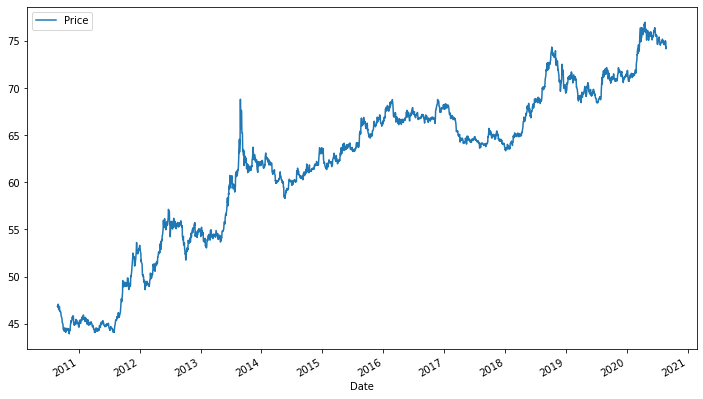

In [7]:
df = data_frame[["Price"]]

#plotting dataset to visualize the pattern of prices over the years

df.plot(kind='line',figsize=(12,7))

Now, checking total data in the dataset in terms of years and further check 80% of the dataset lies within which interval

In [8]:
diff = df.index.values[-1] - df.index.values[0]
days = diff.astype('timedelta64[D]')
days = days / np.timedelta64(1, 'D')
years = int(days/365)
print("Total data: %d years"%years)
print("80 percent data = 2010 to %d"%(2010 + int(0.8*years)))

Total data: 10 years
80 percent data = 2010 to 2018


### Summary Statistics

In [9]:
df.describe()

,Price
count,2610.000000
mean,61.902513
std,8.493784
min,43.925000
25%,55.391250
50%,64.008500
75%,67.807250
max,76.975000


### Train Test Split

As we have seen 80% of the data lies in the interval of 2010 and 2018 so we will train the model for the date range of **26 August 2010 to 26 August 2018** and rest will be used as the testing data

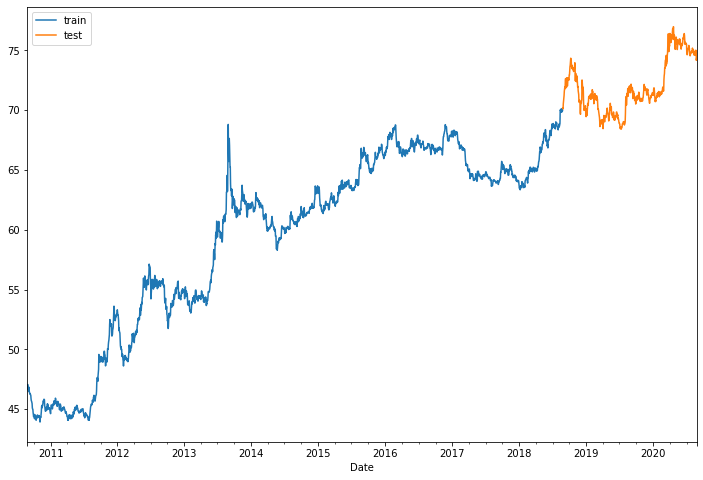

In [10]:
split_date = pd.Timestamp('26-08-2018')

train = df.loc[:split_date]
test = df.loc[split_date:]

ax = train.plot(kind='line',figsize=(12,8))
test.plot(ax=ax,kind='line',figsize=(12,8))
plt.legend(['train', 'test'])

### Data Normalization

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [13]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [14]:
X_train

array([[-1.65766285],
       [-1.66229156],
       [-1.64840545],
       ...,
       [ 1.38604048],
       [ 1.38736297],
       [ 1.41844141]])

### Artificial Neural Network

In [16]:
Keras.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss=tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')], optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history = model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/200
2086/2086 [==============================] - 3s 1ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 2/200
2086/2086 [==============================] - 3s 1ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 3/200
2086/2086 [==============================] - 3s 1ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 4/200
2086/2086 [==============================] - 2s 1ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 5/200
2086/2086 [==============================] - 2s 1ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 6/200
2086/2086 [==============================] - 2s 1ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 7/200
2086/2086 [==============================] - 2s 1ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 8/200
2086/2086 [==============================] - 2s 1ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 9/200
2086/2086 [==============================] - 2s 1ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 10/200
2086/2086 [==============================] - 2s 1ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 11/

2086/2086 [==============================] - 2s 1ms/step - loss: 0.0014 - rmse: 0.0381
Epoch 83/200
2086/2086 [==============================] - 3s 1ms/step - loss: 0.0014 - rmse: 0.0381
Epoch 84/200
2086/2086 [==============================] - 2s 1ms/step - loss: 0.0014 - rmse: 0.0381
Epoch 85/200
2086/2086 [==============================] - 2s 1ms/step - loss: 0.0014 - rmse: 0.0381
Epoch 86/200
2086/2086 [==============================] - 2s 1ms/step - loss: 0.0014 - rmse: 0.0380
Epoch 87/200
2086/2086 [==============================] - 2s 1ms/step - loss: 0.0014 - rmse: 0.0380
Epoch 88/200
2086/2086 [==============================] - 2s 1ms/step - loss: 0.0014 - rmse: 0.0380
Epoch 89/200
2086/2086 [==============================] - 2s 1ms/step - loss: 0.0014 - rmse: 0.0380
Epoch 90/200
2086/2086 [==============================] - 2s 1ms/step - loss: 0.0014 - rmse: 0.0380
Epoch 91/200
2086/2086 [==============================] - 2s 1ms/step - loss: 0.0014 - rmse: 0.0380
Epoch 92/200


2086/2086 [==============================] - 2s 1ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 164/200
2086/2086 [==============================] - 2s 1ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 165/200
2086/2086 [==============================] - 2s 1ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 166/200
2086/2086 [==============================] - 2s 1ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 167/200
2086/2086 [==============================] - 2s 1ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 168/200
2086/2086 [==============================] - 2s 1ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 169/200
2086/2086 [==============================] - 2s 1ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 170/200
2086/2086 [==============================] - 2s 1ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 171/200
2086/2086 [==============================] - 2s 1ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 172/200
2086/2086 [==============================] - 2s 1ms/step - loss: 0.0014 - rmse: 0.0378
Epoc

### ANN Prediction

In [20]:
y_pred_test = model.predict(X_test)
y_train_pred = model.predict(X_train)

train_mse = metrics.mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(train_mse)

test_mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(test_mse)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The  MAE on the Train set is:\t{:0.3f}".format(metrics.mean_absolute_error(y_train, y_train_pred)))

print("The  RMSE on the Train set is:\t{:0.3f}".format(rmse_train))
r2_train = r2_score(y_train, y_train_pred)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test)))
r2_test = r2_score(y_test, y_pred_test)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))
print("The  MAE on the Test set is:\t{:0.3f}".format(metrics.mean_absolute_error(y_test, y_pred_test)))
print("The  RMSE on the Test set is:\t{:0.3f}".format(rmse_test))

The R2 score on the Train set is:	0.993
The  MAE on the Train set is:	0.074
The  RMSE on the Train set is:	0.082
The Adjusted R2 score on the Train set is:	0.993

The R2 score on the Test set is:	0.906
The Adjusted R2 score on the Test set is:	0.906
The  MAE on the Test set is:	0.066
The  RMSE on the Test set is:	0.090


### ANN Prediction Plot

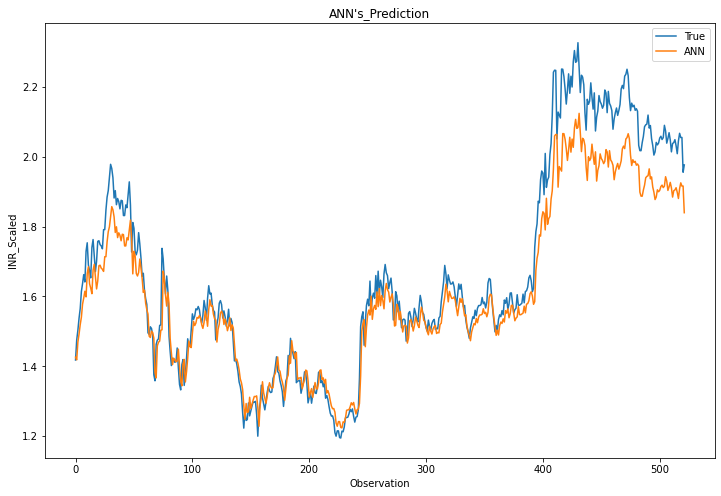

In [21]:
plt.figure(figsize=(12,8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test, label='ANN')
plt.title("ANN's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

### Data preprocessing for LSTM

In [22]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [31]:
X_tr_t

array([[[-1.65766285]],

       [[-1.66229156]],

       [[-1.64840545]],

       ...,

       [[ 1.38604048]],

       [[ 1.38736297]],

       [[ 1.41844141]]])

### LSTM

In [33]:
from keras.layers import LSTM
Keras.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(1, X_train.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_lstm.compile(loss=tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')], optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=50, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100
2086/2086 [==============================] - 5s 2ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 2/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 3/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 4/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 5/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 6/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0017 - rmse: 0.0412
Epoch 7/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0017 - rmse: 0.0412
Epoch 8/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 9/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 10/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 11/

2086/2086 [==============================] - 4s 2ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 83/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 84/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 85/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 86/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 87/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 88/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 89/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 90/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 91/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 92/100


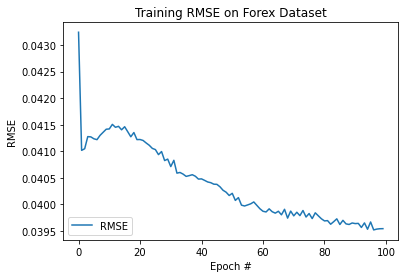

In [41]:
N = 100

plt.figure()

plt.plot(np.arange(0, N), history_model_lstm.history["rmse"], label="RMSE")
plt.title("Training RMSE on Forex Dataset")
plt.xlabel("Epoch #")
plt.ylabel("RMSE")
plt.legend(loc="lower left")

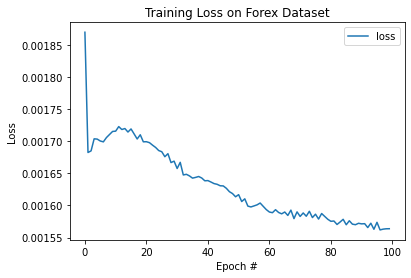

In [42]:
N = 100

plt.figure()



plt.plot(np.arange(0, N), history_model_lstm.history["loss"], label="loss")
plt.title("Training Loss on Forex Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

### LSTM Prediction

In [43]:


y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)

train_mse = metrics.mean_squared_error(y_train, y_train_pred_lstm)
rmse_train = np.sqrt(train_mse)

test_mse = metrics.mean_squared_error(y_test, y_pred_test_lstm)
rmse_test = np.sqrt(test_mse)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("The  MAE on the Train set is:\t{:0.3f}".format(metrics.mean_absolute_error(y_train, y_train_pred_lstm)))

print("The  RMSE on the Train set is:\t{:0.3f}".format(rmse_train))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))
print("The  MAE on the Test set is:\t{:0.3f}".format(metrics.mean_absolute_error(y_test, y_pred_test_lstm)))
print("The  RMSE on the Test set is:\t{:0.3f}".format(rmse_test))

The R2 score on the Train set is:	0.987
The  MAE on the Train set is:	0.103
The  RMSE on the Train set is:	0.116
The Adjusted R2 score on the Train set is:	0.987

The R2 score on the Test set is:	0.979
The Adjusted R2 score on the Test set is:	0.979
The  MAE on the Test set is:	0.032
The  RMSE on the Test set is:	0.042


### LSTM Prediction Plot

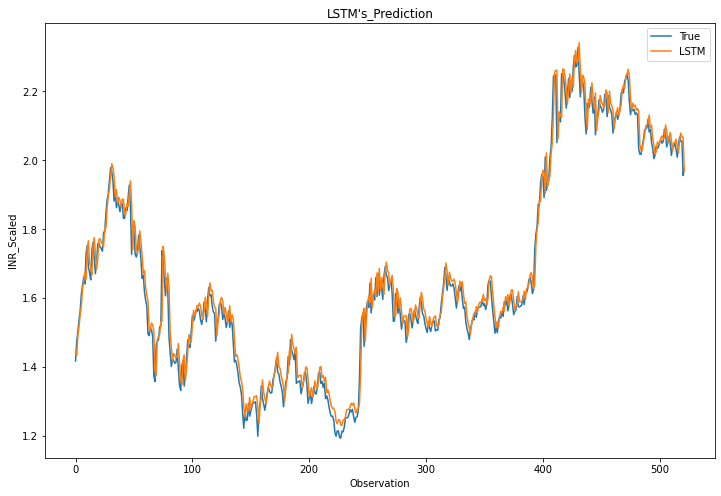

In [44]:
plt.figure(figsize=(12,8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

### GRU

In [45]:
from keras.layers import GRU
Keras.clear_session()
model_gru = Sequential()
model_gru.add(GRU(7, input_shape=(1, X_train.shape[1]), activation='linear', kernel_initializer='lecun_uniform', return_sequences=False))
model_gru.add(Dense(1))
model_gru.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 7)                 210       
_________________________________________________________________
dense (Dense)                (None, 1)                 8         
Total params: 218
Trainable params: 218
Non-trainable params: 0
_________________________________________________________________


In [46]:
model_gru.compile(loss=tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')], optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=50, verbose=1)
history_model_gru = model_gru.fit(X_tr_t, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100
2086/2086 [==============================] - 5s 2ms/step - loss: 0.0097 - rmse: 0.0986
Epoch 2/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 3/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 4/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 5/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 6/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 7/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 8/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 9/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 10/100
2086/2086 [==============================] - 4s 2ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 11/

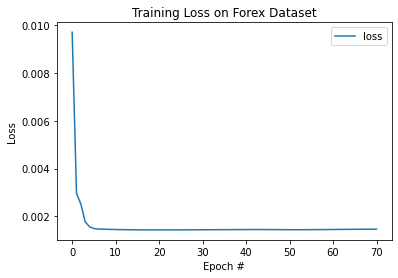

In [47]:
N = 71

plt.figure()



plt.plot(np.arange(0, N), history_model_gru.history["loss"], label="loss")
plt.title("Training Loss on Forex Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

### GRU Prediction

In [48]:


y_pred_test_gru = model_gru.predict(X_tst_t)
y_train_pred_gru = model_gru.predict(X_tr_t)

train_mse = metrics.mean_squared_error(y_train, y_train_pred_gru)
rmse_train = np.sqrt(train_mse)

test_mse = metrics.mean_squared_error(y_test, y_pred_test_gru)
rmse_test = np.sqrt(test_mse)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_gru)))
print("The  MAE on the Train set is:\t{:0.3f}".format(metrics.mean_absolute_error(y_train, y_train_pred_gru)))

print("The  RMSE on the Train set is:\t{:0.3f}".format(rmse_train))
r2_train = r2_score(y_train, y_train_pred_gru)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_gru)))
r2_test = r2_score(y_test, y_pred_test_gru)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))
print("The  MAE on the Test set is:\t{:0.3f}".format(metrics.mean_absolute_error(y_test, y_pred_test_gru)))
print("The  RMSE on the Test set is:\t{:0.3f}".format(rmse_test))

The R2 score on the Train set is:	0.985
The  MAE on the Train set is:	0.103
The  RMSE on the Train set is:	0.120
The Adjusted R2 score on the Train set is:	0.985

The R2 score on the Test set is:	0.900
The Adjusted R2 score on the Test set is:	0.899
The  MAE on the Test set is:	0.069
The  RMSE on the Test set is:	0.093


### GRU Prediction Plot

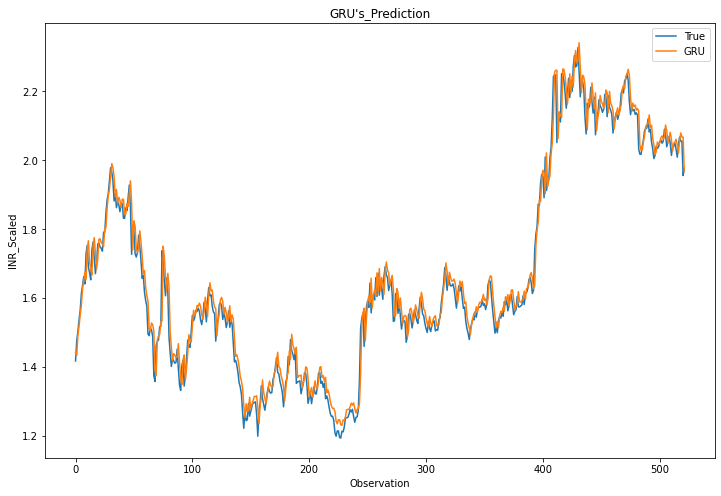

In [49]:
plt.figure(figsize=(12,8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='GRU')
plt.title("GRU's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

In [50]:
inv_yhat = sc.inverse_transform(y_pred_test_gru)

inv_yhat

array([[70.26219 ],
       [70.211334],
       [70.549805],
       [70.71172 ],
       [70.91098 ],
       [71.07102 ],
       [71.35126 ],
       [71.479355],
       [71.625824],
       [71.50568 ],
       [72.00325 ],
       [72.14095 ],
       [71.78308 ],
       [71.69103 ],
       [71.573296],
       [72.06655 ],
       [72.19299 ],
       [71.932434],
       [71.67455 ],
       [71.842865],
       [72.16326 ],
       [72.17441 ],
       [72.1112  ],
       [72.088875],
       [72.04421 ],
       [72.352646],
       [72.352646],
       [72.66391 ],
       [72.874855],
       [72.97845 ],
       [73.19676 ],
       [73.400406],
       [73.33373 ],
       [73.18565 ],
       [72.860054],
       [72.97845 ],
       [72.75275 ],
       [72.85265 ],
       [72.80085 ],
       [72.68612 ],
       [72.82305 ],
       [72.81565 ],
       [72.57874 ],
       [72.57874 ],
       [72.74905 ],
       [72.70463 ],
       [72.91186 ],
       [73.11904 ],
       [72.745346],
       [71.99207 ],


In [51]:
inv_ytest = sc.inverse_transform(y_test)

inv_ytest

array([[70.1  ],
       [70.535],
       [70.745],
       [71.005],
       [71.215],
       [71.585],
       [71.755],
       [71.95 ],
       [71.79 ],
       [72.455],
       [72.64 ],
       [72.16 ],
       [72.037],
       [71.88 ],
       [72.54 ],
       [72.71 ],
       [72.36 ],
       [72.015],
       [72.24 ],
       [72.67 ],
       [72.685],
       [72.6  ],
       [72.57 ],
       [72.51 ],
       [72.925],
       [72.925],
       [73.345],
       [73.63 ],
       [73.77 ],
       [74.065],
       [74.34 ],
       [74.25 ],
       [74.05 ],
       [73.61 ],
       [73.77 ],
       [73.465],
       [73.6  ],
       [73.53 ],
       [73.375],
       [73.56 ],
       [73.55 ],
       [73.23 ],
       [73.23 ],
       [73.46 ],
       [73.4  ],
       [73.68 ],
       [73.96 ],
       [73.455],
       [72.44 ],
       [73.08 ],
       [72.955],
       [72.45 ],
       [72.38 ],
       [72.48 ],
       [72.86 ],
       [72.615],
       [72.31 ],
       [71.915],
       [71.98 

In [52]:
test_mse = metrics.mean_squared_error(inv_ytest, inv_yhat)
rmse_test = np.sqrt(test_mse)


print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(inv_ytest, inv_yhat)))
r2_test = r2_score(inv_ytest, inv_yhat)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))
print("The  MAE on the Test set is:\t{:0.3f}".format(metrics.mean_absolute_error(inv_ytest, inv_yhat)))
print("The  RMSE on the Test set is:\t{:0.3f}".format(rmse_test))

The R2 score on the Test set is:	0.900
The Adjusted R2 score on the Test set is:	0.899
The  MAE on the Test set is:	0.523
The  RMSE on the Test set is:	0.706


In [53]:
test.head()

,Price
Date,
2018-08-27,70.165
2018-08-28,70.100
2018-08-29,70.535
2018-08-30,70.745
2018-08-31,71.005


In [54]:
col1 = pd.DataFrame(inv_ytest, columns=['Price'])

col2 = pd.DataFrame(inv_yhat, columns=['GRU_prediction'])

col3 = pd.DataFrame(history_model_lstm.history['rmse'], columns=['RMSE'])
results = pd.concat([col1, col2, col3], axis=1)
results.to_csv('Prediction_USD_INR_GRU.xlsx')

In [55]:
results.head()

,Price,GRU_prediction,RMSE
0,70.100,70.262192,0.043239
1,70.535,70.211334,0.041017
2,70.745,70.549805,0.041048
3,71.005,70.711723,0.041275
4,71.215,70.910980,0.041270


In [56]:
test.reset_index(level=0, inplace=True)
test.head()

,Date,Price
0,2018-08-27,70.165
1,2018-08-28,70.100
2,2018-08-29,70.535
3,2018-08-30,70.745
4,2018-08-31,71.005


In [57]:
dfinal = test.merge(results, how='inner', left_on='Price', right_on='Price')

In [58]:
dfinal.drop_duplicates(subset="Date",inplace=True)


dfinal.head()

,Date,Price,GRU_prediction,RMSE
0,2018-08-28,70.100,70.262192,0.043239
1,2018-08-29,70.535,70.211334,0.041017
3,2019-02-12,70.535,70.211334,0.041017
5,2018-08-30,70.745,70.549805,0.041048
7,2019-10-28,70.745,70.549805,0.041048


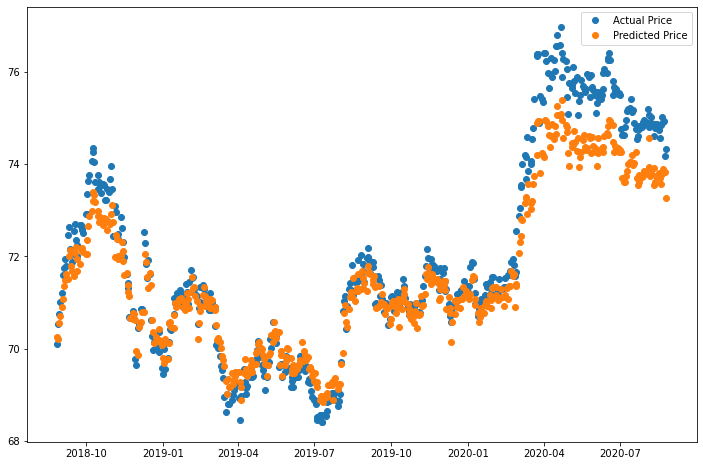

In [59]:
plt.figure(figsize=(12,8))
price_date = dfinal['Date']
price_true = dfinal['Price']
price_pred = dfinal['GRU_prediction']
plt.plot_date(price_date, price_true,label='Actual Price')
plt.plot_date(price_date, price_pred,label='Predicted Price')
plt.legend()
plt.show()

In [60]:
dfinal.describe()

,Price,GRU_prediction,RMSE
count,522.000000,522.000000,112.000000
mean,71.974153,71.610870,0.040379
std,2.230849,1.692593,0.000709
min,68.410000,68.847778,0.039533
25%,70.514250,70.460739,0.039788
50%,71.345000,71.145077,0.040148
75%,73.681500,72.902607,0.041048
max,76.975000,75.378098,0.043239
